### GEHELE JAAR met polyfit

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 20 17:34:56 2024

@author: nicolai
"""
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [2]:
# NDJF
X = np.array([24, 48, 72, 96, 120]) # duren
Xd = np.arange(start=24,stop=121,step=2)
#y = np.array([0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]) # terugkeertijden
#X,Y=np.meshgrid(x,y) # omvang = # y * # x

#### Verandergetallen

In [3]:
# De z-waarden - verandergetallen
Zdata_raw = np.array([1.234020709, 1.173625823, 1.144393269, 1.122356421, 1.109321159]) # => # x's Zie all_scenarios_JAAR.xlsx
#1.197256493 # 36 uur via interpolatie
Zdata = np.round(Zdata_raw,3)
Zdata

array([1.234, 1.174, 1.144, 1.122, 1.109])

In [4]:
p = np.polyfit(X, Zdata, 2)
print(p)

[ 1.26488095e-05 -3.07976190e-03  1.29820000e+00]


In [5]:
print(Zdata)

Zhat = np.polyval(p, X)
print(Zhat)

Zhatd = np.polyval(p, Xd)
#print(Zhatd)

[1.234 1.174 1.144 1.122 1.109]
[1.23157143 1.17951429 1.14202857 1.11911429 1.11077143]


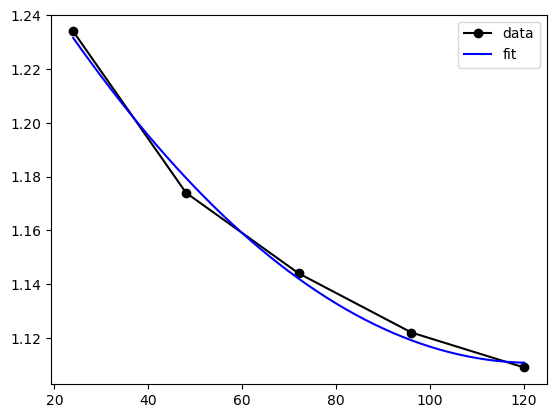

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
linedata, = ax.plot(X,Zdata, linestyle='-', marker='o', label='data', color='k')
linefit, = ax.plot(Xd,Zhatd, linestyle='-', marker='none', label= 'fit', color='b')
ax.legend(handles=[linedata, linefit], loc='best')
plt.show()

[ 1.265e-05 -3.080e-03  1.298e+00]
[1.234 1.174 1.144 1.122 1.109]
[1.2313664 1.1793056 1.1418176 1.1189024 1.11056  ]


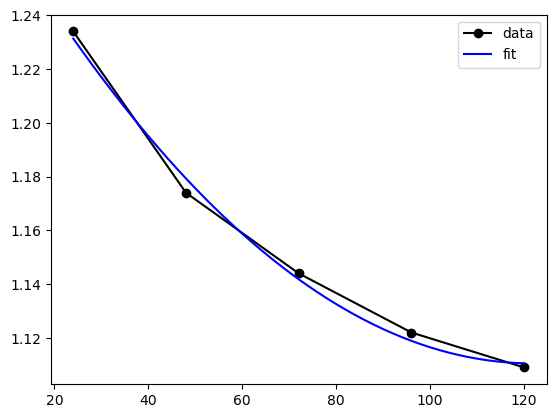

In [7]:
p = np.array([ 1.265e-05, -3.080e-03, 1.298])
print(p)

print(Zdata)

Zhat = np.polyval(p, X)
print(Zhat)

Zhatd = np.polyval(p, Xd)
#print(Zhatd)

fig = plt.figure()
ax = fig.add_subplot(111)
linedata, = ax.plot(X,Zdata, linestyle='-', marker='o', label='data', color='k')
linefit, = ax.plot(Xd,Zhatd, linestyle='-', marker='none', label= 'fit', color='b')
ax.legend(handles=[linedata, linefit], loc='best')
plt.show()

[1.234 1.174 1.144 1.122 1.109]
[ 0.00914319 -0.15079765  1.62090323]
[1.2340067  1.17415695 1.14321992 1.12309295 1.10852347]


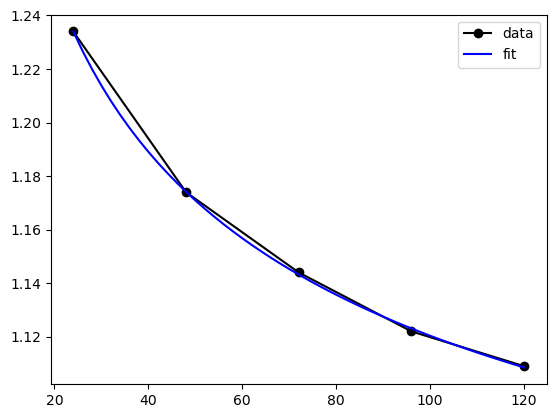

In [8]:
# Logaritmisch polynoom
print(Zdata)

p = np.polyfit(np.log(X), Zdata, 2)
print(p)

Zhat = np.polyval(p, np.log(X))
print(Zhat)

Zhatd = np.polyval(p, np.log(Xd))
#print(Zhatd)

fig = plt.figure()
ax = fig.add_subplot(111)
linedata, = ax.plot(X,Zdata, linestyle='-', marker='o', label='data', color='k')
linefit, = ax.plot(Xd,Zhatd, linestyle='-', marker='none', label= 'fit', color='b')
ax.legend(handles=[linedata, linefit], loc='best')
plt.show()

[ 0.009143 -0.1508    1.621   ]
[1.234 1.174 1.144 1.122 1.109]
[1.23409402 1.17424169 1.14330306 1.12317492 1.10860451]


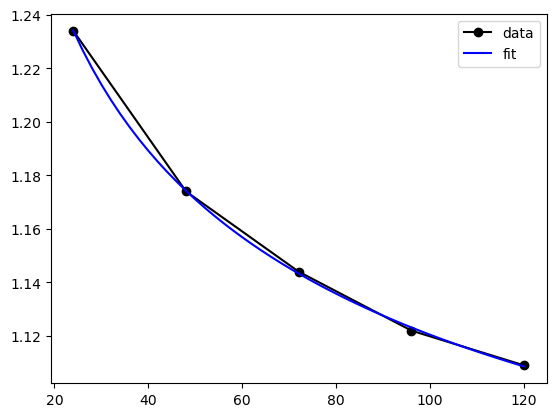

In [9]:
p = np.array([0.009143, -0.1508, 1.621])
print(p)
print(Zdata)

Zhat = np.polyval(p, np.log(X))
print(Zhat)

Zhatd = np.polyval(p, np.log(Xd))
#print(Zhatd)

fig = plt.figure()
ax = fig.add_subplot(111)
linedata, = ax.plot(X,Zdata, linestyle='-', marker='o', label='data', color='k')
linefit, = ax.plot(Xd,Zhatd, linestyle='-', marker='none', label= 'fit', color='b')
ax.legend(handles=[linedata, linefit], loc='best')
plt.show()

JAAR --> Tweedegraads logaritmisch polynoom: 0.009143 * (ln(D))^2 - 0.1508 * ln(D) + 1.621

In [10]:
def logpoly(D):
    return 0.009143 * np.log(D)**2 - 0.1508 * np.log(D) + 1.621

In [11]:
logpoly(36)

1.1980161658627462

In [12]:
def verandergetalfunctie(Ts,D,T=1):
    # Ts: temperatuurstijging in graden Celsius
    # D:  duur in uren
    # T:  terugkeertijd (irrelevante parameter)

    if D < 1/6: 
        raise ValueError(f'Gekozen duur {D} valt buiten domein (10 minuten t/m 240 uur)')
    elif D <= 24:
        v = 1.234
    elif D < 120:
        v = logpoly(D)
    elif D <= 240:
        v = 1.109
    elif D > 240:
        raise ValueError(f'Gekozen duur {D} valt buiten domein: 10 minuten t/m 10 dagen (240 uur)')
  
    return 1 + (v-1) * Ts/4 # de factor v is afgeleid voor 4 graden temperatuurstijging

In [13]:
print(verandergetalfunctie(4,240))

1.109


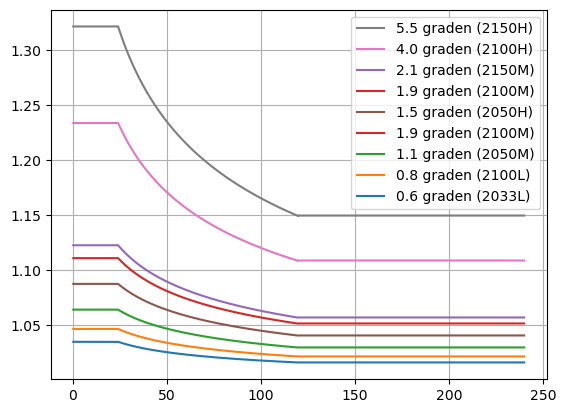

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

temps = np.array([0.6,1,2,4,6])
duren = np.arange(start=1/6,stop=240,step=1/6)

#colors = {0: np.array([68,68,161])/255, 1: np.array([255,193,82])/255, 2: np.array([178,35,35])/255}
colors = {0: 'tab:blue', 1: 'tab:orange', 2: 'tab:green', 3: 'tab:red', 4: 'tab:purple', 
          5: 'tab:brown', 6: 'tab:pink', 7: 'tab:gray', 8: 'tab:olive', 9: 'tab:cyan'}
linestyles = {0: '-', 1: '--', 2: ':', 3: '-', 4: '--', 5: ':', 6: '-', 7: '--', 8: ':'}

vdata0 = [verandergetalfunctie(0.6,d) for d in duren]
vdata1 = [verandergetalfunctie(0.8,d) for d in duren]
vdata2 = [verandergetalfunctie(1.1,d) for d in duren]
vdata3 = [verandergetalfunctie(1.9,d) for d in duren]
vdata4 = [verandergetalfunctie(2.1,d) for d in duren]
vdata5 = [verandergetalfunctie(1.5,d) for d in duren]
vdata6 = [verandergetalfunctie(4,d) for d in duren]
vdata7 = [verandergetalfunctie(5.5,d) for d in duren]

line0, = ax.plot(duren,vdata0, linestyle='-', marker='none', label='0.6 graden (2033L)', color=colors[0])
line1, = ax.plot(duren,vdata1, linestyle='-', marker='none', label='0.8 graden (2100L)', color=colors[1])
line2, = ax.plot(duren,vdata2, linestyle='-', marker='none', label= '1.1 graden (2050M)', color=colors[2])
line3, = ax.plot(duren,vdata3, linestyle='-', marker='none', label= '1.9 graden (2100M)', color=colors[3])
line4, = ax.plot(duren,vdata4, linestyle='-', marker='none', label='2.1 graden (2150M)', color=colors[4])
line5, = ax.plot(duren,vdata5, linestyle='-', marker='none', label= '1.5 graden (2050H)', color=colors[5])
line6, = ax.plot(duren,vdata6, linestyle='-', marker='none', label= '4.0 graden (2100H)', color=colors[6])
line7, = ax.plot(duren,vdata7, linestyle='-', marker='none', label='5.5 graden (2150H)', color=colors[7])

ax.legend(handles=[line7, line6, line4, line3, line5, line3, line2, line1, line0], loc='best')
ax.grid()
plt.show()

In [15]:
def locatieparameter_KNMI_2019_jaar(Duur):
    
    # Invoer: Duur in minuten
    # Invoer:Herhalingstijd in jaar 

    if Duur <= 720 : # Duur is kleiner dan 12u, we gebruiken een GLO-verdeling
        
        # factor 1.02 toegevoegd, zie vergelijking (5)
        
        loc = 1.02*(7.339 + 0.848 * np.log10(Duur) + 2.844 * np.log10(Duur)**2)       
    
    else: # Duur is groter dan 12u, we gebruiken een GEV-verdeling
    
        # factor 1.02 toegevoegd, zie vergelijking (8) 
        # N.B. Dit is een andere factor dan die voor de GLO-verdeling
        
        loc = 1.02*(0.239 - 0.0250 * np.log(Duur/60))**(-1/0.512)
    
    return loc

def dispersiecoefficient_KNMI_2019_jaar(Duur): 
    
    if Duur <= 720 : # Duur is kleiner dan 12u, we gebruiken een GLO-verdeling
        
        if Duur <= 104:
                    
            disp = 0.04704 + 0.1978 * np.log10(Duur) - 0.05729 * np.log10(Duur)**2
            
        else:
            
            disp = 0.2801 - 0.0333 * np.log10(Duur)
            
    else: # Duur is groter dan 12u, we gebruiken een GEV-verdeling
    
        disp = 0.478 - 0.0681 * np.log10(Duur)
        
    return disp

def vormparameter_KNMI_2019_jaar(Duur,T):
    
    if Duur <= 720 : # Duur is kleiner dan 12u, we gebruiken een GLO-verdeling
        
        if Duur <= 90:
                    
            vorm = -0.0336 - 0.264 * np.log10(Duur) + 0.0636 * (np.log10(Duur))**2  
            
        else:
            
            if T <= 120: # in formule (7) STOWA2019 staat 'T<=1'
                
                vorm = -0.0336 - 0.264 * np.log10(Duur) + 0.0636 * (np.log10(Duur))**2  

            else:
                
                vorm = -0.310 - 0.0544 * np.log10(Duur) + 0.0288 * (np.log10(Duur))**2  
       
    else: # Duur is groter dan 12u, we gebruiken een GEV-verdeling
        
        vorm = 0.118 - 0.266 * np.log10(Duur) + 0.0586 * (np.log10(Duur)**2) 
    
    return vorm

def vol_KNMI_2019_jaar(Duur, T):
    
    # Invoer: Duur in minuten
    # Invoer: Herhalingstijd in jaar 
    # Uitvoer: Volume in mm

    Locpar = locatieparameter_KNMI_2019_jaar(Duur)
    Vormpar = vormparameter_KNMI_2019_jaar(Duur,T)
    dispcoeff = dispersiecoefficient_KNMI_2019_jaar(Duur)
    Schaalpar = dispcoeff * Locpar
    
    if Duur <= 720: # Duur is kleiner dan 12u, we gebruiken een GLO-verdeling
    
        Vol_KNMI_2019_jaar = Locpar + (Schaalpar/ Vormpar) * (1 - ((1-np.exp(-1/T))/(np.exp(-1/T))) ** Vormpar)   
        
        if (Duur > 90 )& (120< T)&(T <= 165):
            # Vergelijking (11)
            Vormpar_T120 = vormparameter_KNMI_2019_jaar(Duur,120)
            Vol_KNMI_2019_jaar_T120 = Locpar + (Schaalpar/ Vormpar_T120) * (1 - ((1-np.exp(-1/120))/(np.exp(-1/120))) ** Vormpar_T120)
            Vol_KNMI_2019_jaar = max(Vol_KNMI_2019_jaar, Vol_KNMI_2019_jaar_T120)
        
        #Vol_KNMI_2019_jaar = 1.02*Vol_KNMI_2019_jaar 
        # Deze 1.02 is conform STOWA2019 in de locatieparameter verwerkt.
        
    else: # Duur is groter dan 12u, we gebruiken een GEV-verdeling
        
        Vol_KNMI_2019_jaar = Locpar + (Schaalpar / Vormpar) * (1- (1/T)**Vormpar)
            
    return Vol_KNMI_2019_jaar

In [16]:
Ts = [0.5, 1, 2, 5, 10, 20, 25, 50, 100, 200, 250, 500, 1000] # in jaren
Ts_str = ['0.5 jaar', '1 jaar', '2 jaar', '5 jaar', '10 jaar', '20 jaar', '25 jaar', '50 jaar', '100 jaar', '200 jaar', '250 jaar', '500 jaar', '1000 jaar'] # in jaren
dduren = [1/6, 1/2, 1, 2, 4, 8, 12, 24, 48, 96, 192, 240] # in uren, 240 uur = 10 dagen
dduren_str = ['10 min', '30 min', '60 min', '2 uur', '4 uur', '8 uur', '12 uur', '24 uur', '2 dagen', '4 dagen', '8 dagen', '10 dagen'] 

scenarios = dict({'2033L': 0.6, '2100Ln': 0.8,'2050Mn': 1.1,'2100Mn': 1.9,'2150Mn': 2.1,'2050Hn': 1.5,'2100Hn': 4,'2150Hn': 5.5, 
                  'huidig': 0.0,'2100Ld': 0.8, '2050Md': 1.1,'2100Md': 1.9,'2150Md': 2.1,'2050Hd': 1.5,'2100Hd': 4,'2150Hd': 5.5})

for s in scenarios:
    temp = scenarios[s]
    df_vg_JAAR = pd.DataFrame(index=Ts_str, columns=dduren_str)
    df_vg_JAAR2 = pd.DataFrame(index=Ts_str, columns=dduren_str)
    df_vol_JAAR = pd.DataFrame(index=Ts_str, columns=dduren_str)
    
    for i, T in enumerate(Ts):
        for j, duur in enumerate(dduren):
            df_vg_JAAR.iat[i,j] = verandergetalfunctie(temp,duur,T)
            df_vg_JAAR2.iat[i,j] = (verandergetalfunctie(temp,duur,T) - 1) * 100
            df_vol_JAAR.iat[i,j] = verandergetalfunctie(temp,duur,T) * vol_KNMI_2019_jaar(60*duur, T)
            
    # Write each dataframe to a different worksheet.
    with pd.ExcelWriter(f"Statistiek_JAAR_{s}.xlsx") as writer:
        df_vg_JAAR.to_excel(writer, sheet_name="Factor", float_format="%.3f")
        df_vg_JAAR2.to_excel(writer, sheet_name="Percentage", float_format="%.3f")
        df_vol_JAAR.to_excel(writer, sheet_name="Volume", float_format="%.1f")
        
#    with df_v_JAAR 
#    df_v_JAAR.to_excel(f'verandergetal_{s}_JAAR.xlsx')
#df_v_JAAR.style \
#         .format(precision=2, decimal=".")
#(df_v_JAAR-1)*100